In [1]:
import torch
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pysr
import pickle

/Users/simon/mambaforge/lib/python3.10/site-packages/juliacall/__init__.py:60: UserWarning: torch was imported before juliacall. This may cause a segfault. To avoid this, import juliacall before importing torch. For updates, see https://github.com/pytorch/pytorch/issues/78829.
  warnings.warn(


Detected Jupyter notebook. Loading juliacall extension. Set `PYSR_AUTOLOAD_EXTENSIONS=no` to disable.


In [21]:
# version = 87804
# version = 72872
# version = 80525
# version = 15579
version = 33060
results_path = f'sr_results/{version}.pkl'
reg = pickle.load(open(results_path, 'rb'))
assert len(reg.equations_) == 2
results = reg.equations_[0]  # equations for predicting the mean

In [25]:
# print the complexities for the mean
print(list(results['complexity']))

[1, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


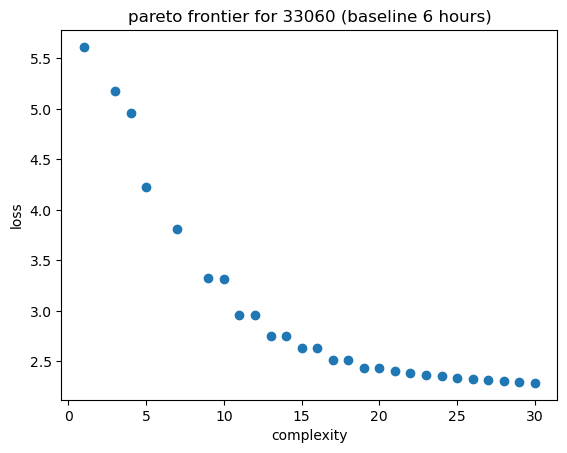

In [26]:
# plot the pareto curve for results
x = results['complexity']
y = results['loss']
# plot the pareto frontier
plt.scatter(x, y)
plt.xlabel('complexity')
plt.ylabel('loss')
# plt.ylim(0, max(y)+1)
plt.title(f'pareto frontier for {version} (baseline 6 hours)')
plt.savefig(f'pareto_{version}.png')
plt.show()



In [13]:
labels = ['time', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno', 'a1', 'e1', 'i1', 'cos_Omega1', 'sin_Omega1', 'cos_pomega1', 'sin_pomega1', 'cos_theta1', 'sin_theta1', 'a2', 'e2', 'i2', 'cos_Omega2', 'sin_Omega2', 'cos_pomega2', 'sin_pomega2', 'cos_theta2', 'sin_theta2', 'a3', 'e3', 'i3', 'cos_Omega3', 'sin_Omega3', 'cos_pomega3', 'sin_pomega3', 'cos_theta3', 'sin_theta3', 'm1', 'm2', 'm3', 'nan_mmr_near', 'nan_mmr_far', 'nan_megno']

# not all of these labels are actually used. for training, these inputs are zeroed out, but still passed in as zeroes.
# ideally, the linear layer ignores them, which does happen if i do l1 regularization to it
skipped = ['nan_mmr_near', 'nan_mmr_far', 'nan_megno', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno']


In [14]:
better_names = ['m_' + labels[i] for i in range(len(labels))] + ['s_' + labels[i] for i in range(len(labels))]

In [15]:
# for each equation in reg.equations_[0]['equation'], find and replace 'm{i}' with 'm_{labels[i]', and 's{i}' with 's_{labels[i]}'
for eq_ix in range(len(results['equation'])):
    for i in range(len(labels)):
        results.at[eq_ix, 'equation'] = reg.equations_[0]['equation'][eq_ix].replace('m{}'.format(i), 'm_{}'.format(labels[i]))
        results.at[eq_ix, 'equation'] = reg.equations_[0]['equation'][eq_ix].replace('s{}'.format(i), 's_{}'.format(labels[i]))

In [23]:
# dont print columns 'sympy_format' and 'lambda_format'
results.drop(columns=['sympy_format', 'lambda_format'])

,complexity,loss,score,equation
0,1,5.613354,0.000000,7.022938
1,3,5.177334,0.040429,(s39 ^ -0.35236323)
2,4,4.959506,0.042984,(7.248863 - sin(m41))
3,5,4.230701,0.158938,((6.995907 - m41) + m13)
4,7,3.812898,0.051989,((1.2545598 / (0.15079877 + s34)) - m41)
5,9,3.320236,0.069177,((1.2641392 / (0.1508634 + s34)) - (m61 / s18))
6,10,3.312022,0.002477,((1.2641392 / (0.1508634 + sin(s34))) - (m61 /...
7,11,2.955253,0.113974,((1.0196365 / (0.14766802 + s34)) - ((m61 - s4...
8,12,2.955217,0.000012,((1.0196365 / (0.14766802 + s34)) - (sin(m61 -...
9,13,2.754527,0.070327,((0.96191245 / (0.14181688 + s34)) - (((m61 - ...


In [24]:
for i in range(len(results)):
    print(i, results['equation'][i])

0 7.022938
1 (s39 ^ -0.35236323)
2 (7.248863 - sin(m41))
3 ((6.995907 - m41) + m13)
4 ((1.2545598 / (0.15079877 + s34)) - m41)
5 ((1.2641392 / (0.1508634 + s34)) - (m61 / s18))
6 ((1.2641392 / (0.1508634 + sin(s34))) - (m61 / s18))
7 ((1.0196365 / (0.14766802 + s34)) - ((m61 - s43) / s77))
8 ((1.0196365 / (0.14766802 + s34)) - (sin(m61 - s43) / s77))
9 ((0.96191245 / (0.14181688 + s34)) - (((m61 - s43) + m37) / s14))
10 ((0.96191245 / (sin(0.14181688) + s34)) - (((m61 - s43) + m37) / s14))
11 ((0.96191245 / ((0.14181688 + s34) - m67)) - (((m61 - s43) + m37) / s14))
12 ((0.96191245 / ((sin(0.14181688) + s34) - m67)) - (((m61 - s43) + m37) / s14))
13 (((1.0505583 ^ m13) / ((0.14766802 - m67) + s34)) - (((m61 - s43) + m37) / s14))
14 (((1.0505583 ^ m13) / ((0.14766802 - m67) + s34)) - ((sin(m61 - s43) + m37) / s14))
15 (((1.0428426 ^ m13) / (0.14766802 - ((m67 - s34) - m56))) - (((m61 - s43) + m37) / s14))
16 (((1.0428426 ^ m13) / (0.14766802 - ((m67 - s34) - m56))) - ((sin(m61 - s43) + m